In [1]:
import sys
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import random
from tqdm import tqdm
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten

# import third-party library
sys.path.append('./my_lib/')
from data_augmentation import DataAugmentation

c:\users\luca\anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# import data
csv_train = pd.read_csv('../input/labels.csv')
csv_test = pd.read_csv('../input/sample_submission.csv')

In [3]:
# read training CSV
csv_train.head(10)

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
5,002211c81b498ef88e1b40b9abf84e1d,bedlington_terrier
6,00290d3e1fdd27226ba27a8ce248ce85,bedlington_terrier
7,002a283a315af96eaea0e28e7163b21b,borzoi
8,003df8b8a8b05244b1d920bb6cf451f9,basenji
9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound


In [4]:
# read test csv
csv_test.head(10)

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
4,001a5f3114548acdefa3d4da05474c2e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
5,00225dcd3e4d2410dd53239f95c0352f,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
6,002c2a3117c2193b4d26400ce431eebd,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
7,002c58d413a521ae8d1a5daeb35fc803,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
8,002f80396f1e3db687c5932d7978b196,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
9,0036c6bcec6031be9e62a257b1c3c442,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333


In [5]:
# Generate Labels
targets_series = pd.Series(csv_train['breed'])
# print(targets_series)
one_hot = pd.get_dummies(targets_series, sparse = True)
labels = np.asarray(one_hot)
n_check = random.randint(0, len(labels)-1)
print(csv_train['breed'][n_check], 'is encoded as', ''.join((str(i) for i in labels[n_check])))

bedlington_terrier is encoded as 000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000


In [6]:
im_size = 90

x_train = []
y_train = []
x_test = []

In [7]:
for i, (f, breed) in enumerate(tqdm(csv_train.values)):
    img = cv2.imread('../input/train/{}.jpg'.format(f))
    x_train.append(cv2.resize(img, (im_size, im_size)))
    y_train.append(labels[i])

100%|███████████████████████████████████████████████████████████████████████████| 10222/10222 [00:35<00:00, 288.69it/s]


Use external module to execute data augmentation.
The module execute:
- [x] Inversion
- [ ] Sobel derivative
- [ ] Scharr derivative
- [ ] Laplacian <!--**(error not used for now)**-->
- [ ] Blur
- [ ] Gaussian blur [disable]
- [ ] Median blur
- [ ] Bilateral blur
- [x] Horizontal flips
- [x] Rotation

  0%|                                                                                        | 0/10222 [00:00<?, ?it/s]

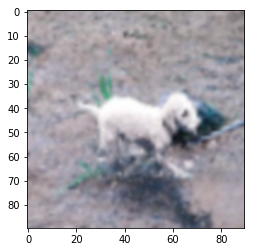

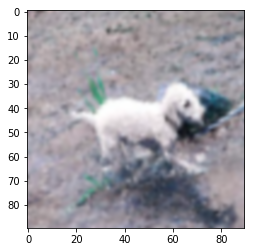

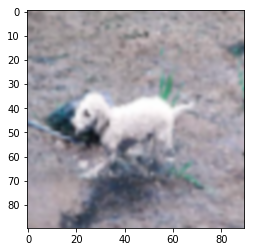

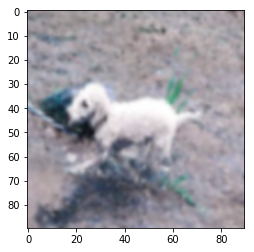

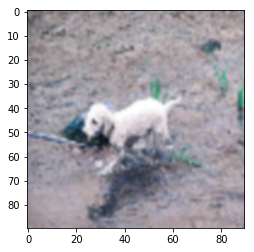

100%|██████████████████████████████████████████████████████████████████████████| 10222/10222 [00:02<00:00, 3569.62it/s]


dataset became: 61332


In [8]:
for i, images in enumerate(tqdm(DataAugmentation(x_train,
                                                 options={'inverse': False,
                                                          'sobel_derivative': False,
                                                          'scharr_derivative': False,
                                                          'laplacian': False,
                                                          'blur': False,
                                                          'gaussian_blur': False,
                                                          'median_blur': False,
                                                          'bilateral_blur': False,
                                                          'horizontal_flips': True,
                                                          'rotation': True,
                                                          'shuffle_result': False}))):
    for image in images:
        if i == 5:
            plt.imshow(image, cmap = 'gray', interpolation = 'bicubic')
            plt.show()
        x_train.append(image)
        y_train.append(y_train[i])
    
print('dataset became:', len(x_train))

label: 000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000


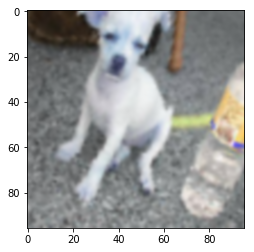

In [ ]:
# check train
n_check = random.randint(0, len(y_train)-1)
print('label:', ''.join((str(i) for i in y_train[n_check])))
plt.imshow(x_train[n_check], cmap = 'gray', interpolation = 'bicubic')
plt.show()

In [6]:
for f in tqdm(csv_test['id'].values):
    img = cv2.imread('../input/test/{}.jpg'.format(f))
    x_test.append(cv2.resize(img, (im_size, im_size)))

100%|███████████████████████████████████████████████████████████████████████████| 10357/10357 [00:29<00:00, 354.16it/s]


In [7]:
# build np array and normalise them
X_train = np.array(x_train, np.float32) / 255.
y_train = np.array(y_train, np.uint8)
X_test  = np.array(x_test, np.float32) / 255.

In [8]:
print("x_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", X_test.shape)

x_train shape: (10222, 96, 96, 3)
y_train shape: (10222, 120)
x_test shape: (10357, 96, 96, 3)


In [10]:
num_classes = y_train.shape[1]
classes = csv_test.columns.values[1:]

Using the __stratify__ parameter on __treain_test_split__ the split should be equally distributed per classes.

**TODO:** Add cross validation 

In [ ]:
# X_train, X_valid, Y_train, Y_valid = train_test_split(x_train_raw, y_train_raw,
#                                                       test_size=0.25, random_state=42,
#                                                       stratify=y_train_raw)

In [11]:
# Create the base pre-trained model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(im_size, im_size, 3))

# Add a new top layer
x = base_model.output
x = Flatten()(x)
predictions = Dense(num_classes, activation='softmax')(x)

# This is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# First: train only the top layers (which were randomly initialized)
for layer in base_model.layers:
    layer.trainable = False

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

# callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_acc', patience=3, verbose=1)]
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 96, 96, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 96, 96, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 96, 96, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 48, 48, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 48, 48, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 48, 48, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 24, 24, 128)       0         
__________

In [12]:
from sklearn.model_selection import StratifiedKFold

# Instantiate the cross validator
skf = StratifiedKFold(n_splits=num_classes, shuffle=True)

history_data = {}
# Loop through the indices the split() method returns
for index, (train_indices, val_indices) in enumerate(skf.split(X_train, y_train)):
    print("Training on fold " + str(index+1) + "/10...")

    # Generate batches from indices
    xtrain, xval = X_train[train_indices], X_train[val_indices]
    ytrain, yval = y_train[train_indices], y_train[val_indices]

    # Debug message I guess
    print("Training new iteration on " + str(xtrain.shape[0]) + " training samples, " + str(xval.shape[0]) + " validation samples, this may be a while...")
    
    history = model.fit(xtrain, Ytrain, epochs=1, batch_size=32, validation_data=(xval, yval), # callbacks=callbacks_list, 
                        verbose=1)
   
    history_data['loss'] += history.history['loss']
    history_data['val_loss'] += history.history['val_loss']
    history_data['acc'] += history.history['acc']
    history_data['val_acc'] += history.history['val_acc']

# history = model.fit(X_train, Y_train, epochs=5, batch_size=32, validation_data=(X_valid, Y_valid), callbacks=callbacks_list, verbose=1)

ValueError: Supported target types are: ('binary', 'multiclass'). Got 'multilabel-indicator' instead.

In [ ]:
# list all data in history
print(history_data.keys())
# summarize history for accuracy
plt.plothistory_data['acc'])
plt.plot(history_data['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_data['loss'])
plt.plot(history_data['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
preds = model.predict(x_test_raw, verbose=1)

In [ ]:
# check predict
n_check = random.randint(0, len(x_test_raw)-1)
plt.imshow(x_test_raw[n_check], cmap = 'gray_r', interpolation = 'bicubic')
plt.show()
pre = model.predict(np.array([x_test_raw[n_check]]))
arg_max = np.argmax(pre)
print(np.max(pre), arg_max, labels[arg_max])